### Import necessary libraries

In [21]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats

In [22]:
df = pd.read_csv('../data/sierra_leone.csv')

### Summary and missing values

In [ ]:
df.describe()
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

### Handle missing values

In [ ]:
# Only fill numeric columns with their medians to avoid trying to convert non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
medians = df[numeric_cols].median()
df[numeric_cols] = df[numeric_cols].fillna(medians)

# If Timestamp is a string column that should be datetime, coerce it (won't affect numeric fill)
if 'Timestamp' in df.columns and df['Timestamp'].dtype == 'object':
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Optionally forward-fill non-numeric columns (keeps fully-NA columns like Comments unchanged)
non_num_cols = df.columns.difference(numeric_cols)
for c in non_num_cols:
    df[c].fillna(method='ffill', inplace=True)

C:\Users\BIOS\AppData\Local\Temp\ipykernel_6440\4049305632.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(method='ffill', inplace=True)
C:\Users\BIOS\AppData\Local\Temp\ipykernel_6440\4049305632.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[c].fillna(method='ffill', inplace=True)


### Outlier detection

In [ ]:

z_scores = np.abs(stats.zscore(df.select_dtypes('number')))
df = df[(z_scores < 3).all(axis=1)]

In [12]:
# Save cleaned data
df.to_csv('../data/sierra_leone_clean.csv', index=False)

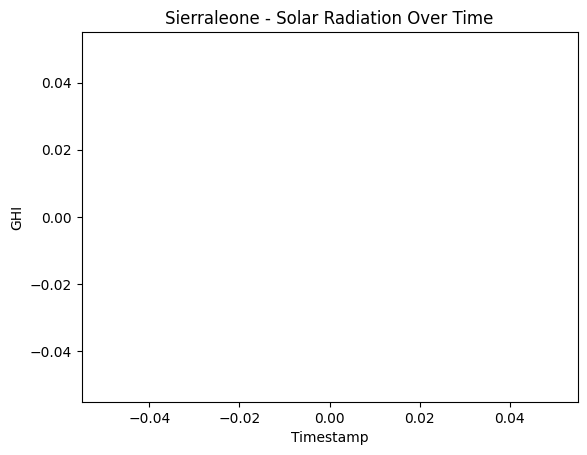

In [13]:
# Plot examples
sns.lineplot(x='Timestamp', y='GHI', data=df)
plt.title('Sierraleone - Solar Radiation Over Time')
plt.show()

## Load & prepare Sierra Leone dataset

Read the Sierra Leone CSV, parse the Timestamp column, coerce numeric-like columns, and add helper time columns (month, hour). The cell after this will show a quick preview and basic schema checks.


In [15]:
# Load data and parse timestamps
import pandas as pd, numpy as np

sl_df = pd.read_csv('../data/sierra_leone.csv', parse_dates=['Timestamp'], dayfirst=False)
if 'Timestamp' not in sl_df.columns and 'timestamp' in sl_df.columns:
    sl_df.rename(columns={'timestamp':'Timestamp'}, inplace=True)
sl_df.sort_values('Timestamp', inplace=True)
sl_df.reset_index(drop=True, inplace=True)
# Coerce object-like numeric columns where possible
for c in sl_df.columns:
    if sl_df[c].dtype == 'object' and c not in ['Timestamp']:
        sl_df[c] = pd.to_numeric(sl_df[c], errors='ignore')
# helper cols
sl_df['month'] = sl_df['Timestamp'].dt.month
sl_df['hour'] = sl_df['Timestamp'].dt.hour
sl_df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,month,hour
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,...,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,10,0
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,...,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,10,0
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,...,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,10,0
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,...,0.0,0.0,1002,0,0.1,22.3,22.6,NaN,10,0
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,...,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,10,0


### Summary and missing values for Sierra Leone

In [ ]:
# numeric summary
from IPython.display import display

display(sl_df.describe())
missing = sl_df.isna().sum()
display(missing.sort_values(ascending=False))
# columns with >5% missing
pct_missing = (missing / len(sl_df)) * 100
cols_over_5pct = pct_missing[pct_missing > 5].sort_values(ascending=False)
print('Columns with >5% missing:')
print(cols_over_5pct)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,month,hour
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,...,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0,525600.000000,525600.000000
mean,2022-04-30 12:00:30.000000768,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,...,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN,6.526027,11.500000
min,2021-10-30 00:01:00,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,...,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN,1.000000,0.000000
25%,2022-01-29 06:00:45,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,...,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN,4.000000,5.750000
50%,2022-04-30 12:00:30,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,...,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN,7.000000,11.500000
75%,2022-07-30 18:00:15,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,...,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN,10.000000,17.250000
max,2022-10-30 00:00:00,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,...,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN,12.000000,23.000000
std,NaN,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,...,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN,3.447855,6.922193


Comments         525600
GHI                   0
DNI                   0
DHI                   0
Timestamp             0
ModA                  0
ModB                  0
RH                    0
Tamb                  0
WSgust                0
WSstdev               0
WD                    0
WS                    0
WDstdev               0
BP                    0
Precipitation         0
Cleaning              0
TModA                 0
TModB                 0
month                 0
hour                  0
dtype: int64

Columns with >5% missing:
Comments    100.0
dtype: float64


### Outlier detection using IQR method

In [ ]:
cols_iqr = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
cols_iqr = [c for c in cols_iqr if c in sl_df.columns]

outliers_iqr = pd.Series(False, index=sl_df.index)

for c in cols_iqr:
    q1 = sl_df[c].quantile(0.25)
    q3 = sl_df[c].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    mask = (sl_df[c] < lower) | (sl_df[c] > upper)
    print(f"{c}: detected {mask.sum()} IQR outliers")
    outliers_iqr = outliers_iqr | mask

sl_df['outlier_iqr'] = outliers_iqr
print('Total rows flagged by IQR method:', sl_df['outlier_iqr'].sum())
# show first flagged rows
display(sl_df.loc[sl_df['outlier_iqr'], cols_iqr].head(10))


GHI: detected 15853 IQR outliers
DNI: detected 101688 IQR outliers
DHI: detected 4407 IQR outliers
ModA: detected 21017 IQR outliers
ModB: detected 20613 IQR outliers
WS: detected 3169 IQR outliers
WSgust: detected 3665 IQR outliers
Total rows flagged by IQR method: 108253


,GHI,DNI,DHI,ModA,ModB,WS,WSgust
651,664.2,108.2,569.6,706.3,689.3,0.8,1.6
652,718.3,155.5,584.1,767.6,748.9,0.2,1.1
653,814.0,257.0,594.3,878.0,856.0,0.5,1.1
654,826.0,263.5,599.6,883.0,861.0,1.7,2.4
655,851.0,285.0,605.9,912.0,890.0,1.6,2.1
656,823.0,254.8,603.9,878.0,856.0,0.8,1.6
657,810.0,244.5,598.8,864.0,843.0,0.6,1.6
658,932.0,397.7,589.4,1002.0,978.0,1.7,2.4
659,995.0,492.6,571.1,1065.0,1039.0,1.6,2.1
660,988.0,504.2,552.7,1050.0,1025.0,1.5,2.4


In [19]:
# Imputation strategy: interpolate wind columns (WS, WSgust) and median for irradiance/temp where needed
wind_cols = [c for c in ['WS','WSgust'] if c in sl_df.columns]
irr_temp_cols = [c for c in ['GHI','DNI','DHI','Tamb','RH'] if c in sl_df.columns]

print('Missing before imputation:')
print(sl_df[wind_cols+irr_temp_cols].isna().sum())

# Interpolate wind columns (time-based interpolation if Timestamp is present)
for c in wind_cols:
    if sl_df[c].isna().any():
        # use Timestamp as the index for time-based interpolation without changing the dataframe index
        if 'Timestamp' in sl_df.columns and pd.api.types.is_datetime64_any_dtype(sl_df['Timestamp']):
            s = sl_df[c].copy()
            s.index = sl_df['Timestamp']
            sl_df[c] = s.interpolate(method='time').values
        else:
            sl_df[c] = sl_df[c].interpolate()

# Median imputation for irradiance/temp
for c in irr_temp_cols:
    if sl_df[c].isna().any():
        sl_df[c].fillna(sl_df[c].median(), inplace=True)

print('\nMissing after imputation:')
print(sl_df[wind_cols+irr_temp_cols].isna().sum())


Missing before imputation:
WS        0
WSgust    0
GHI       0
DNI       0
DHI       0
Tamb      0
RH        0
dtype: int64

Missing after imputation:
WS        0
WSgust    0
GHI       0
DNI       0
DHI       0
Tamb      0
RH        0
dtype: int64


In [20]:
# Save cleaned Sierra Leone data
import os
os.makedirs('data', exist_ok=True)
clean_path = 'data/sierra_leone_clean.csv'
sl_df.to_csv(clean_path, index=False)
print(f'Saved cleaned data to {clean_path}')


Saved cleaned data to data/sierra_leone_clean.csv
